# Exercise on EDA using Haberman Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# To ignore all warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('whitegrid')
sns.set(font_scale= 1, context='notebook')
#Reading the haberman dataset in dfhaberman
dfhaberman = pd.read_csv('haberman.csv', names = ['age','Operation Year','axil nodes','Survival status'])

In [3]:
#Displaying the haberman dataset for few data points
dfhaberman.head(3)

,age,Operation Year,axil nodes,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1


In [4]:
#To print the number of rows and columns in haberman data set.
print(dfhaberman.shape)

(306, 4)


** Total number of data points and attributes in haberman dataset are 306 and 4 respectively.**

In [5]:
# To print the column names of haberman data set.
print(dfhaberman.columns)

Index(['age', 'Operation Year', 'axil nodes', 'Survival status'], dtype='object')


** Above mentioned are the attributes of haberman dataset**

In [6]:

print(dfhaberman['Survival status'].value_counts())

1    225
2     81
Name: Survival status, dtype: int64


** Haberman dataset has two Survival status as follows:**   
**1 with 225 data points and**      
**2 with 81 data points**

**Since the number of data points in class 1 and 2 are not equal, therefore we can say that haberman data set is an imbalanced dataset.**

**Survival status 1 indicates that the patient survived 5 years or longer**     
**Survival status 2 indicates that the patient patient died within 5 year**

In [7]:
# To display the basic info of haberman data set.
dfhaberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                306 non-null int64
Operation Year     306 non-null int64
axil nodes         306 non-null int64
Survival status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


Above observations makes it clear that no columns in the haberman dataset has null value. All the values are integers.

In [8]:
# To print the haberman data set for first 10 rows.
dfhaberman.head(10)

,age,Operation Year,axil nodes,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [9]:
# To replace the survival status column values of 1 and 2 by 'yes' and 'no' respectively.
dfhaberman['Survival status'] = np.where(dfhaberman['Survival status'] == 1 , 'yes', 'no')

In [10]:
# To print the survival column of haberman data set after replacing 1 and 2 with 'yes' and 'no' respectively.
dfhaberman['Survival status'].head(10)


0    yes
1    yes
2    yes
3    yes
4    yes
5    yes
6    yes
7     no
8     no
9    yes
Name: Survival status, dtype: object

In [11]:
dfhaberman['Survival status'].value_counts()

yes    225
no      81
Name: Survival status, dtype: int64

**Changing Survival status from 1 to yes and survival status from 2 to no.**

**Survival status now provides the information as, whether the patient survived for more than 5 years and longer as Yes and if not than No. **

# OBSERVATIONS:
1) Total number of data points and features in Haberman dataset is 306 and 4 respectively.  
2)Age, Operational Year , Positive axil nodes are the features and Survival status is the class.  
3)The Survival status class indicates whether the patient survivde for more than 5 years longer or not. The number of patient survived 5years and longer is 225 as against patient died within 5 years which is 81. Hence haberman data set is an imbalanced dataset.

# Objective

To determine whether a patient will survive for more than 5 years or longer by using the following features: age, opertional year and  axil nodes .

# Univariate Analysis

**1) PDF**

Text(0.5,1,' Plot of histogram and kernel density plot of age with survival status')

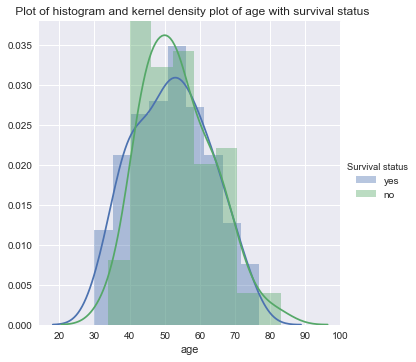

In [13]:
# To plot the histogram and kernel density plot of age with survival status as class label using distplot from haberman data set.
haberVar = sns.FacetGrid(dfhaberman, hue ='Survival status', size = 5)
haberVar.map(sns.distplot,'age',  kde = True).add_legend()
plt.title(" Plot of histogram and kernel density plot of age with survival status")

# Observation:

** From above graph we can see that the PDF's of age with respect to survival till 5 years or longer and death within 5 years are almost overlapping with each other. Hence its difficult to predict whether a person will survive till 5 years or no from age feature.**

In [14]:
# To plot the histogram and kernel density plot of Operation Year with survival status as class label using distplot from haberman data set.
haberVar = sns.FacetGrid(dfhaberman, hue ='Survival status', size = 5)
haberVar.map(sns.distplot,'Operation Year').add_legend()
 plt.title("Plot of histogram and kernel density of Operation year with survival status")

IndentationError: unexpected indent (<ipython-input-14-257a19dbae96>, line 4)

# Observation:

** From above graph we can see that the PDF's of Operation Year with respect to survival till 5 years or longer and death within 5 years are almost overlapping with each other. Hence its difficult to predict whether a person will survive till 5 years or no from operation year.**

In [15]:
# To plot the histogram and kernel density plot of axil nodes with survival status as class label using distplot from haberman data set.
haberVar = sns.FacetGrid(dfhaberman, hue ='Survival status', size = 5)
haberVar.map(sns.distplot,'axil nodes').add_legend()
 plt.title("Plot of histogram and kernel density of axial nodes with survival status")

IndentationError: unexpected indent (<ipython-input-15-e33e6b1eb3bc>, line 4)

# Observation:

**From above graph we can see that the PDF's of axil nodes with respect to survival till 5 years or longer and death within 5 years are almost overlapping with each other. Hence its difficult to predict whether a person will survive till 5 years or no from axil nodes.**

# CDF

In [16]:
# To get haberman data set of patient who survived and not survived from original haberman data set
dfhaberSurYes = dfhaberman.loc[dfhaberman['Survival status'] == 'yes'] # haberman data set who survived.
dfhaberSurNo = dfhaberman.loc[dfhaberman['Survival status'] == 'no'] # haberman data set who did not survived.

In [17]:
# To display the total number of patient survived.
dfhaberSurYes.shape

(225, 4)

In [18]:
# To display the total number of patient died.
dfhaberSurNo.shape

(81, 4)

In [19]:
def pdf( num1):
    """To calculate the pdf of num1"""
    return num1 / (sum(num1))
def cdf (num2):
    """To calculate the cdf of num2"""
    return np.cumsum(num2)
def plotdup(sizebin, value1,value2,value3,value4,linelabel,linelabe2,linelabe3,linelabe4,plotname,sizebin1):
    """Function defined to plot four data on one plot."""
    plt.plot(sizebin[1:], value1, label = linelabel)
    plt.plot(sizebin[1:],value2,label = linelabe2)
    plt.plot(sizebin1[1:], value3,label = linelabe3)
    plt.plot(sizebin1[1:],value4,label = linelabe4)
    plt.xlabel(plotname)
    return

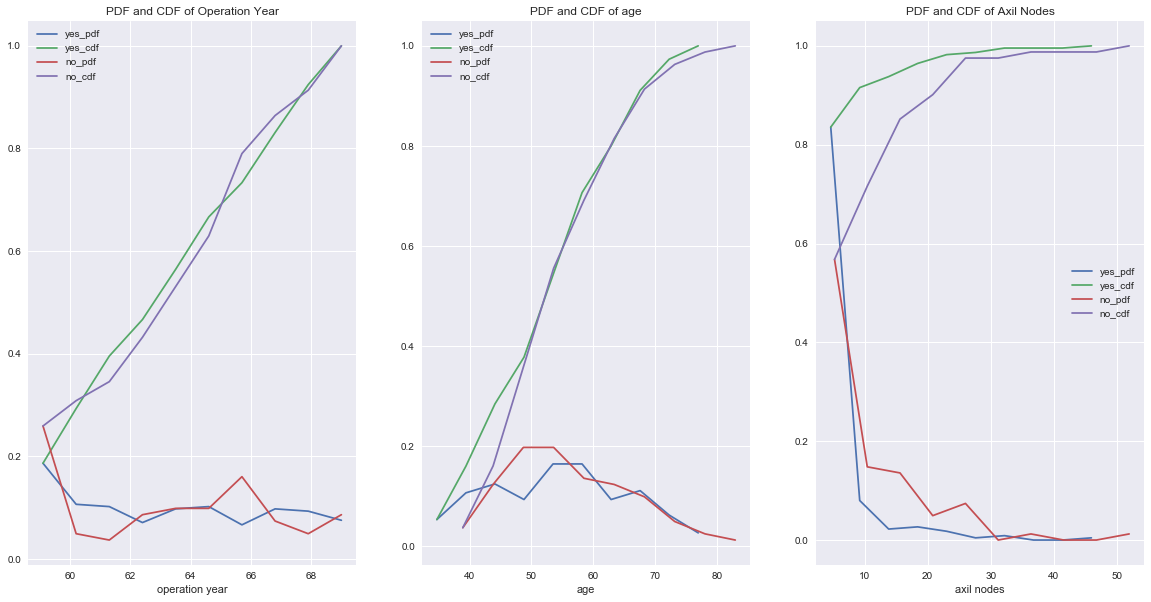

In [20]:
#To calculate the histogram of the operation year from haberman survived data set.
countsy, binsizey = np.histogram(dfhaberSurYes['Operation Year'])
#To calculate the histogram of the operation year from haberman not survived data set.
countsn, binsizen = np.histogram(dfhaberSurNo['Operation Year'])
pdfy = pdf(countsy) #to calculate the probability mass function of operation year for survived patient
cdfy = cdf(pdfy) # to calculate the CDF from PDF.
pdfn = pdf(countsn)#to calculate the probability mass function of operation year for patient who did not survive.
cdfn = cdf(pdfn)#to calculate the CDF from PDF.
plt.figure(figsize=(20,10))# setting the size of the figure.
plt.subplot(1,3,1)
# To plot the pdf and cdf of haberman dataset for operation year
plotdup(binsizey,pdfy,cdfy,pdfn,cdfn,'yes_pdf','yes_cdf','no_pdf','no_cdf','operation year',binsizen)

plt.title('PDF and CDF of Operation Year')
plt.legend()
#To calculate the histogram,pdf and cdf of the age from haberman survived data set.
countsy, binsizey = np.histogram(dfhaberSurYes['age'])
countsn, binsizen = np.histogram(dfhaberSurNo['age'])
pdfy = pdf(countsy)
cdfy = cdf(pdfy)
pdfn = pdf(countsn)
cdfn = cdf(pdfn)
plt.subplot(1,3,2)
plotdup(binsizey,pdfy,cdfy,pdfn,cdfn,'yes_pdf','yes_cdf','no_pdf','no_cdf','age',binsizen)
plt.title('PDF and CDF of age')
plt.legend()
#To calculate the histogram,pdf and cdf of the axil nodes from haberman survived data set.
countsy, binsizey = np.histogram(dfhaberSurYes['axil nodes'])
countsn, binsizen = np.histogram(dfhaberSurNo['axil nodes'])
pdfy = pdf(countsy)
cdfy = cdf(pdfy)
pdfn = pdf(countsn)
cdfn = cdf(pdfn)
plt.subplot(1,3,3)
plotdup(binsizey,pdfy,cdfy,pdfn,cdfn,'yes_pdf','yes_cdf','no_pdf','no_cdf','axil nodes',binsizen)
plt.title('PDF and CDF of Axil Nodes')
plt.legend()

# Observation:

**CDF of age, operation year and axil nodes with survival status, does not help in determining whether the patient will survive for 5 years or longer. **


# Boxplot

In [21]:
# to fix the figure size of all box plots .
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
# To plot box plots for age , operation year and axil nodes of haberman data set.
sns.boxplot(x= 'Survival status', y ='age', data = dfhaberman, hue = 'Survival status')
 plt.title("Box plot of Survival Status")
plt.subplot(1,3,2)
sns.boxplot(x= 'Survival status', y ='Operation Year', data = dfhaberman, hue = 'Survival status')
plt.title("Box plot of Operation Year")
plt.subplot(1,3,3)
sns.boxplot(x= 'Survival status', y ='axil nodes', data = dfhaberman, hue = 'Survival status')
plt.title("Box plot of Axial Nodes")

IndentationError: unexpected indent (<ipython-input-21-fafbd7ff6f84>, line 6)

# Observations:

**1) if the age of the patient is below 42 - 43 year than there is around 26% chance of patient surviving for 5 years or longer.**  
**2) if the age of the patient is above 60 years, than there is around 2% chance that patient will die.**  
**3) if the operation year was 1965 and above than there is 10% chance of patient surviving for 5 years or longer.**  
**4) if the operation year is before 1960 than there is around 30% chance that the patient won't survive.**  
**5) if the number of axil nodes is zero, than patient wil survive 5 years or longer.**  

# Violin Plots

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(1,3,1)
# To plot the violin plot of age, operation year and axil nodes of haberman data set.
sns.violinplot(x='Survival status', y ='age', data = dfhaberman, hue = 'Survival status')
plt.title("Violin plot of Survival Status")
plt.subplot(1,3,2)
sns.violinplot(x='Survival status', y ='Operation Year', data = dfhaberman, hue = 'Survival status')
plt.title("Violin plot of Operation Year")
plt.subplot(1,3,3)
sns.violinplot(x='Survival status', y ='axil nodes', data = dfhaberman, hue = 'Survival status')
plt.title("Violin plot of Axil nodes")

# Observation:

**Looking at the violin plots again its very difficult to predict whether the patient will survive or not.**

# Bivariate Analysis

# Scatter plots

Text(0.5,1,'Scatter plot of age and operation year')

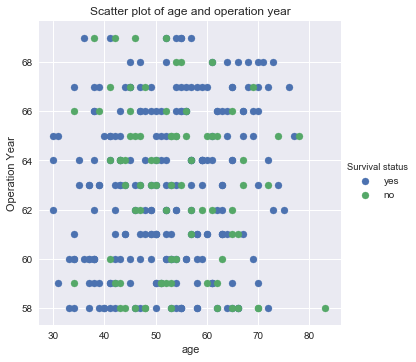

In [22]:
# To plot scatter plot of age versus operation year of haberman data set.
sns.FacetGrid(data = dfhaberman, hue = 'Survival status', size = 5, aspect = 1).map(plt.scatter,'age','Operation Year')\
.add_legend()
plt.title("Scatter plot of age and operation year")

# Observations:

**1) If the age of the patient is less than 32 years than the patient will survive for 5 years or longer irrespective of the operation year. **  
** 2) If the age of the patient is above 78 years than the patient will not survive irrespective when the patient was operated. **  
**3) If the age of the patient is between 33 years and 77 years, than its difficult to predict the survival of the patient irrespective of the operation year.**

Text(0.5,1,'Scatter plot of age and axil nodes')

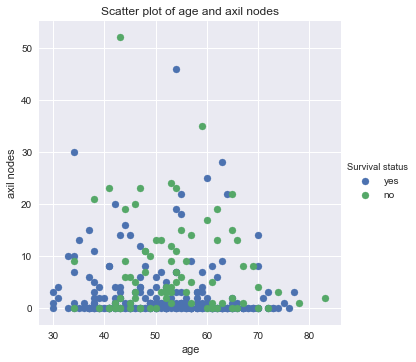

In [23]:
# To plot scatter plot of age versus axil nodes of haberman data set.
sns.FacetGrid(data = dfhaberman, hue = 'Survival status', size = 5, aspect = 1).map(plt.scatter,'age','axil nodes')\
.add_legend()
plt.title("Scatter plot of age and axil nodes")

# Observations:

** 1) We observe that if the age is less than 33 years and if the number of axil nodes is less than 5, than the patient will survive 5 years or longer.**  
** 2) We also observe that if the age of the patient is above 78 years, the patient won't survive even if the number of axil nodes is less than 5.**  
** 3) If the age of the patient is between 34 years and 77 years, its very difficult to predict the survival of the patient irrespective of the number of axil nodes. **

Text(0.5,1,'Scatter plot of axil nodes and operation year')

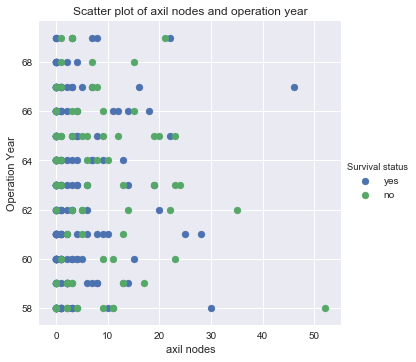

In [32]:
# To plot scatter plot of axil nodes versus operation year of haberman data set.

sns.FacetGrid(data = dfhaberman, hue = 'Survival status', size = 5, aspect = 1).map(plt.scatter,'axil nodes','Operation Year')\
.add_legend()
plt.title("Scatter plot of axil nodes and operation year")



# Observations:

**1) If the number of axil nodes is more than 50 and if operation year is 1958, than the probability that the patient will not survive is on higher side. **  
**2) If the number of axil nodes is between 40 and 50 and if operation year is above 1966, than the probability that the patient will survive is on higher side.**  
**3) For rest of the cases, its very difficult to predict the survival of the patient.**

# Pair Plots

Text(0.5,1,'Pair plots of haberman dataset')

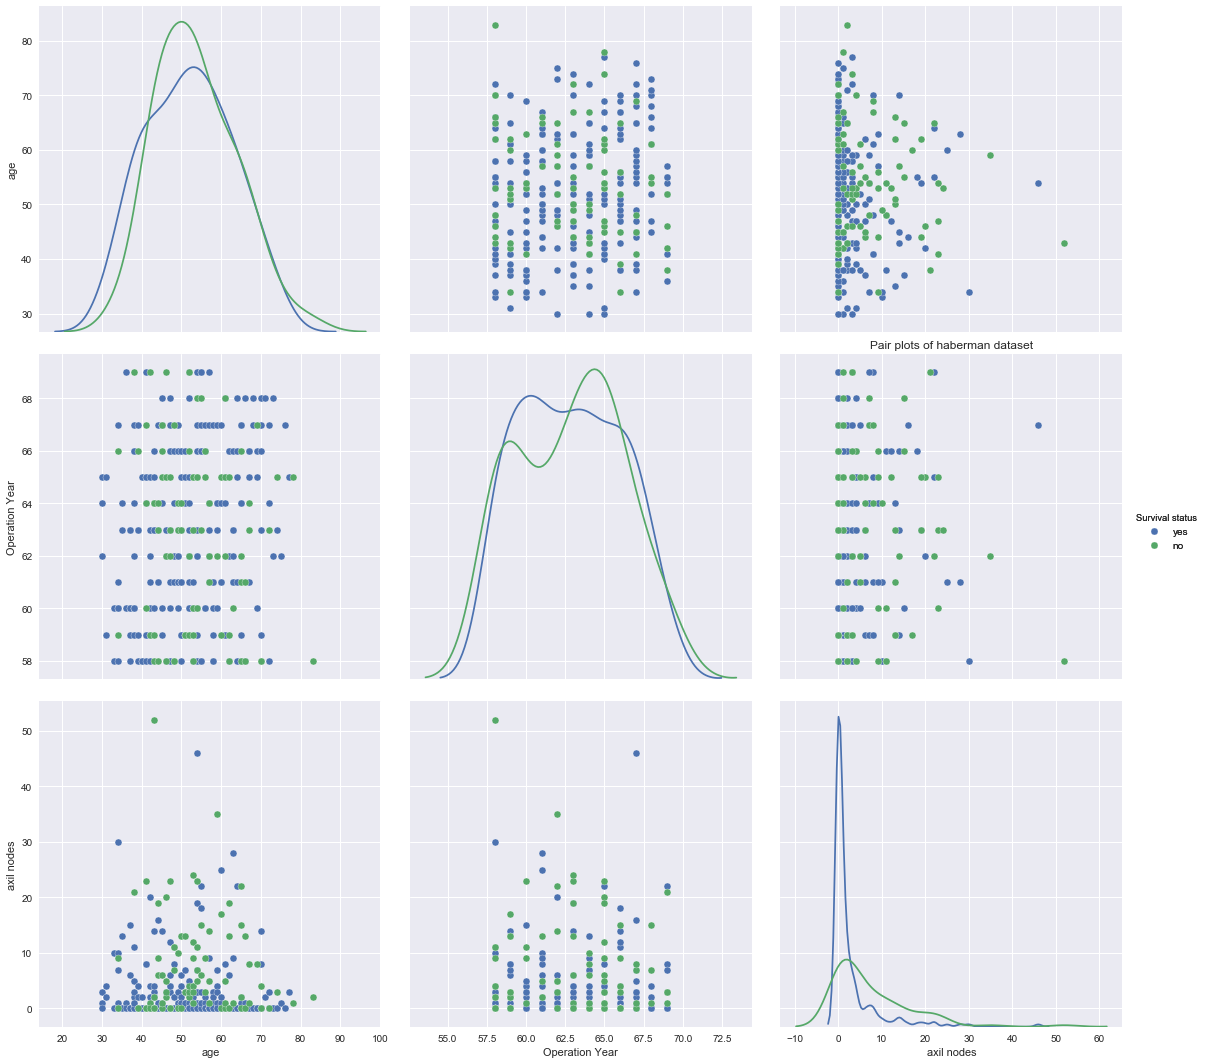

In [34]:
# To plot pair plots of haberman data set.

sns.pairplot(dfhaberman,hue = 'Survival status',size = 5, aspect= 1, diag_kind='kde').add_legend()
plt.title("Pair plots of haberman dataset")


# Observation:

** if the number of axil nodes is less than 5, than the probabilty that the patient will survive is no the higher side. Rest of the observations are already noted in the scatter plots. **

# Conclusion:

**1)Finally from the above EDA, we can conclude that if the age of the person is less than 33 years and if the number of nodes is less than 5, than the patient will survive for 5 years or longer. But if the age of the patient is above 78 years and is the number of nodes is more than one than the patient wont survive for 5 years or longer.**  
**2) If the age of the patient is between 34 years and 77 years, its very difficult to predict the survival of the patient either using univariate or bi-variate analysis. **


# END 